In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taylor-swift-the-eras-tour-official-setlist-data/era_tour_setlist.csv


pandas to load dataframe used from https://www.kaggle.com/datasets/yukawithdata/taylor-swift-the-eras-tour-official-setlist-data

In [16]:
df = pd.read_csv(os.path.join(dirname, filename))

In [17]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   artist_name         44 non-null     object 
 1   track_name          44 non-null     object 
 2   is_explicit         44 non-null     bool   
 3   album_release_date  44 non-null     object 
 4   genres              44 non-null     object 
 5   danceability        44 non-null     float64
 6   valence             44 non-null     float64
 7   energy              44 non-null     float64
 8   loudness            44 non-null     float64
 9   acousticness        44 non-null     float64
 10  instrumentalness    44 non-null     float64
 11  liveness            44 non-null     float64
 12  speechiness         44 non-null     float64
 13  key                 44 non-null     int64  
 14  tempo               44 non-null     float64
 15  mode                44 non-null     int64  
 16  duration_m

artist_name           0
track_name            0
is_explicit           0
album_release_date    0
genres                0
danceability          0
valence               0
energy                0
loudness              0
acousticness          0
instrumentalness      0
liveness              0
speechiness           0
key                   0
tempo                 0
mode                  0
duration_ms           0
time_signature        0
popularity            0
dtype: int64

INSPECT DATA
info() = quick summary of the df, including data types and non-null counts
describe() = generates descriptive statistics for numerical columns to understand data distribution
isnull() = missing value

In [18]:
df.drop_duplicates(inplace=True)

CLEAN DATA
handle missing data and remove duplicate data

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


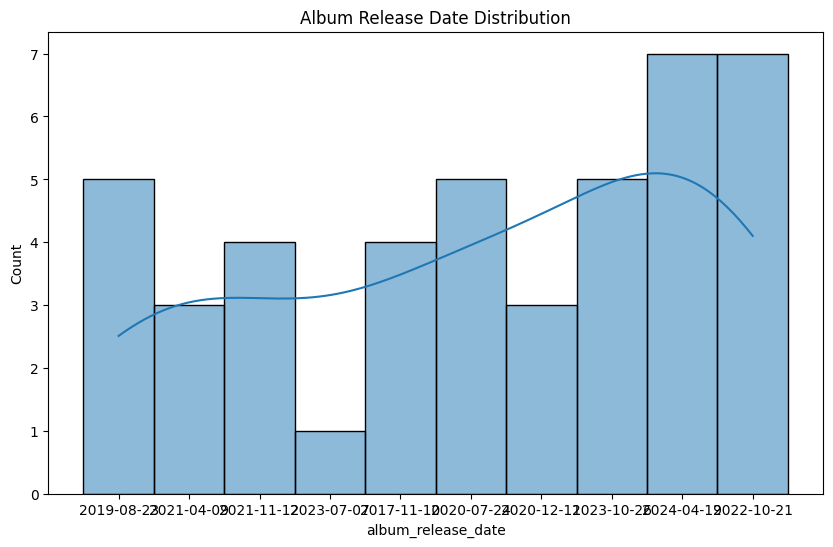

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['album_release_date'], kde=True)
plt.title('Album Release Date Distribution')
plt.show()

VISUALIZATION
album release date distribution using histogram with kde (curve line)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


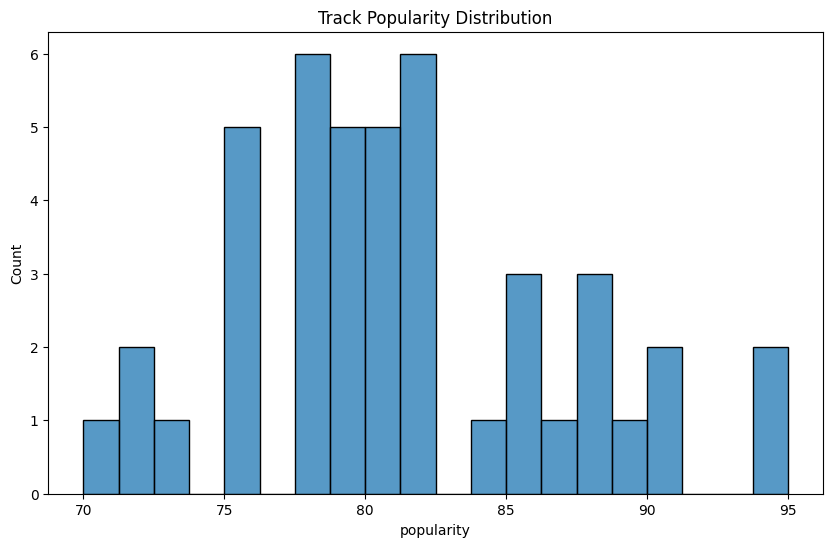

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=20)
plt.title('Track Popularity Distribution')
plt.show()

popularity histogram with 20 bin (interval)

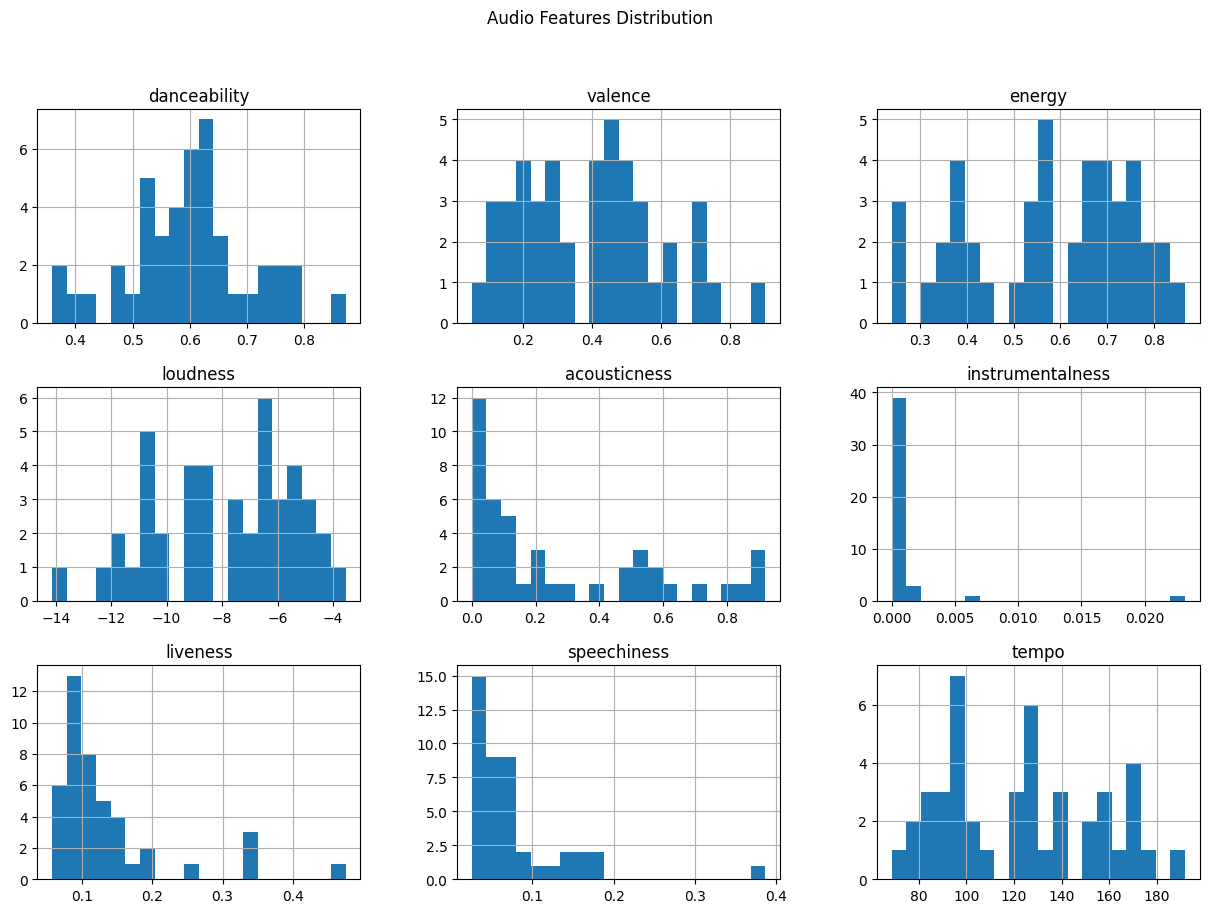

In [21]:
audio_features = ['danceability', 'valence', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo']
df[audio_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Audio Features Distribution')
plt.show()

multiple histogram in 1 visual

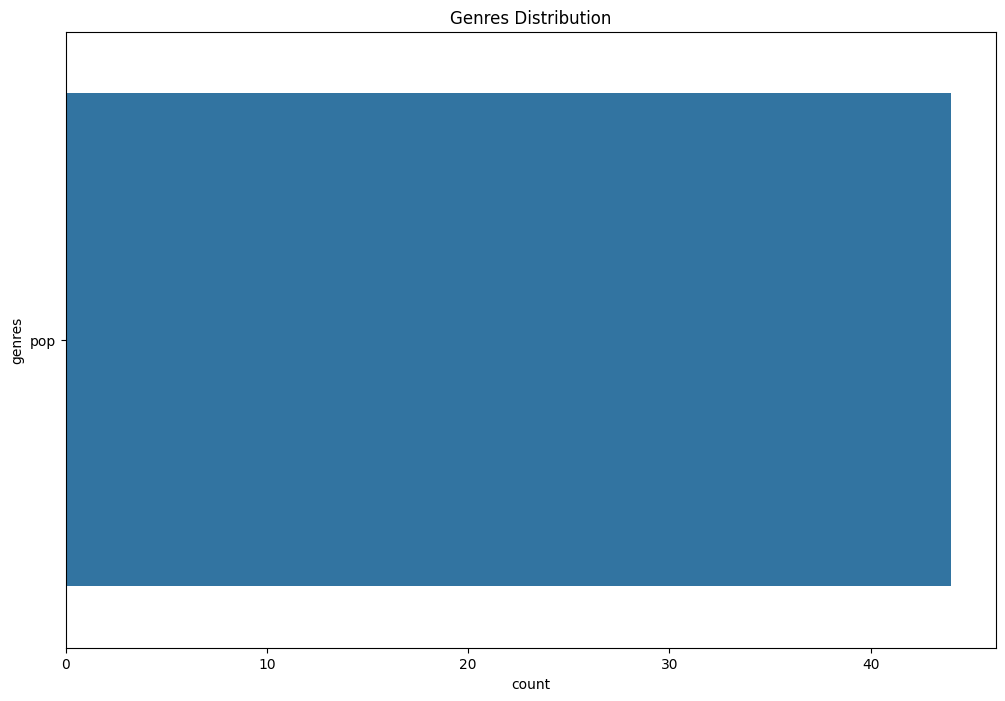

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(y='genres', data=df, order=df['genres'].value_counts().index)
plt.title('Genres Distribution')
plt.show()

genre distrubution using countplot (horizontal graph) in descending order (default)

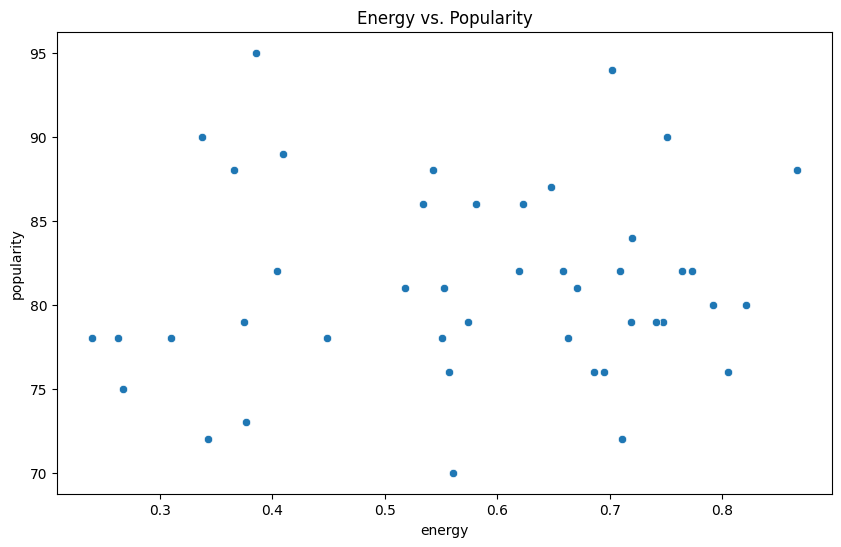

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', data=df)
plt.title('Energy vs. Popularity')
plt.show()

relationship between energy vs popularity using scatterplot

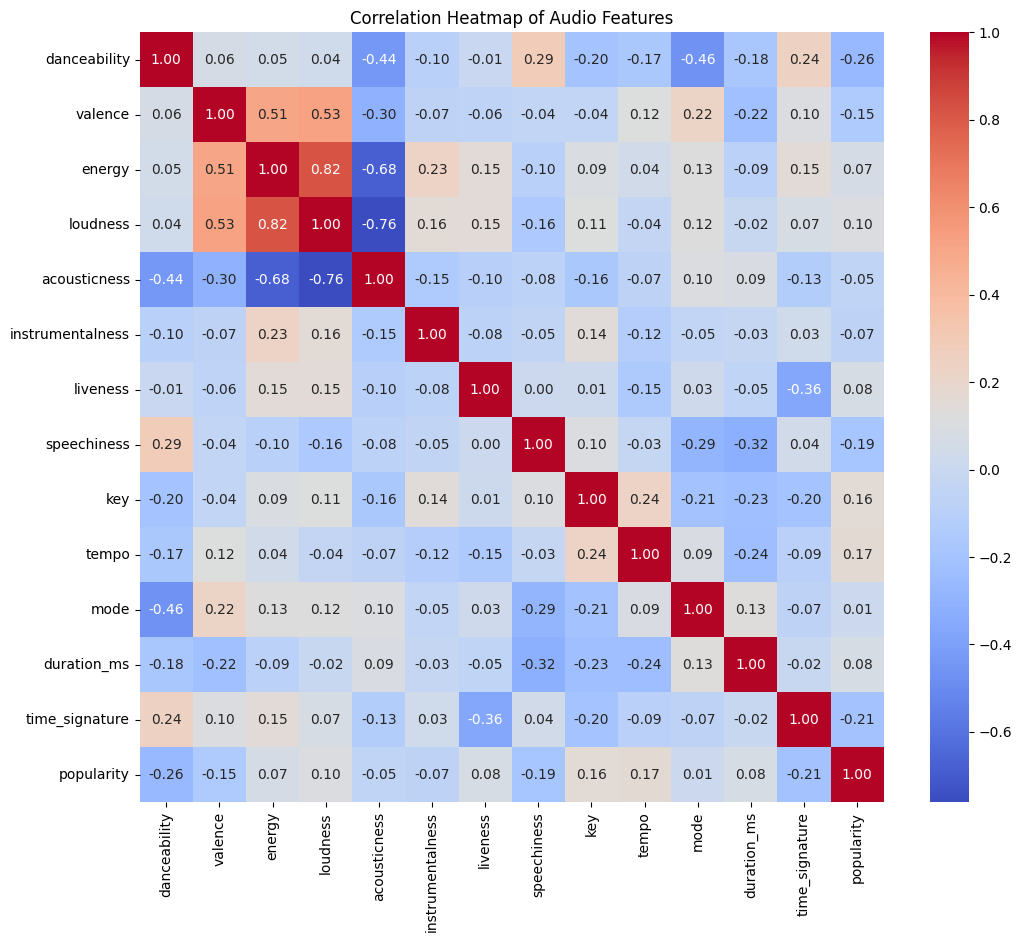

In [24]:
numeric_columns = df[['danceability', 'valence', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'key', 'tempo', 'mode', 'duration_ms', 'time_signature', 'popularity']]
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Audio Features')
plt.show()

correlation heatmap to indentify pattern, and correlation. ex: correlation of -0.76 between acousticness and loudness indicates a strong negative relationship where more acoustic tracks tend to be quieter, and less acoustic tracks tend to be louder

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

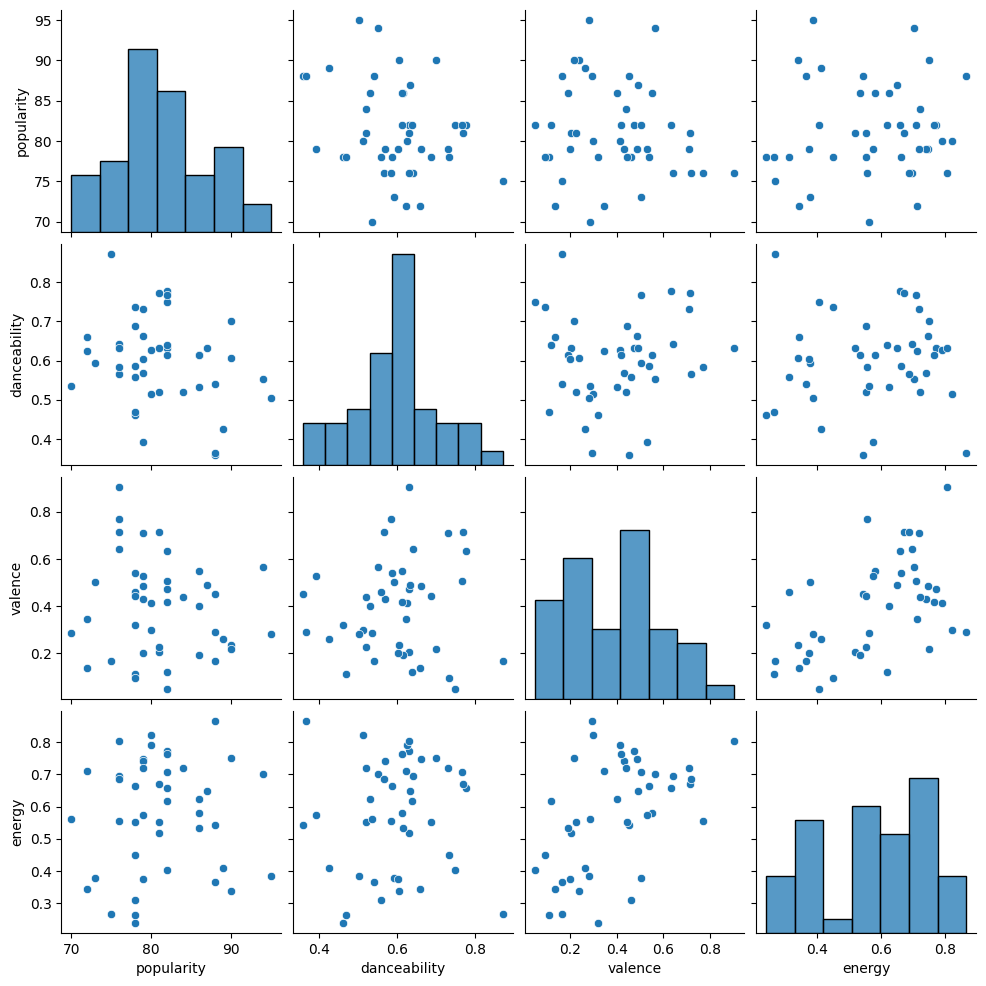

In [25]:
sns.pairplot(df, vars=['popularity', 'danceability', 'valence', 'energy'])
plt.show()

popularity analysis using pairplot that involves comparison of multiple columns